In [16]:
import os
import sys
sys.path.append('..')
sys.path.append('../../')
from glob import glob

from config.config import cfg

In [17]:
import numpy as np
from PIL import Image, ImageFile
from plyfile import PlyData

## 3D Plot 用ライブラリをロード

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
base_dir = cfg.LINEMOD_DIR
object_name = 'ape'

## read_mask_np Test

In [20]:
def read_mask_np(mask_path: str) -> np.ndarray:
    """
    マスク画像を読み出し，ndarray 配列 [max = 255，min = 0] として返す関数．

    Args:
        mask_path (str): マスク画像のパス

    Returns:
        mask_seg(np.ndarray): マスク画像の ndarray 配列
    """
    mask = Image.open(mask_path)
    mask_seg = np.array(mask).astype(np.int32)
    return mask_seg

In [21]:
idx = 1

mask_path = os.path.join(cfg.PVNET_LINEMOD_DIR, '{}/mask/{:04}.png'.format(object_name, idx))

mask = read_mask_np(mask_path=mask_path)
print('mask type')
print(type(mask))
print('max =')
print(mask.max())
print('mask =')
print(mask)

mask type
<class 'numpy.ndarray'>
max =
255
mask =
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


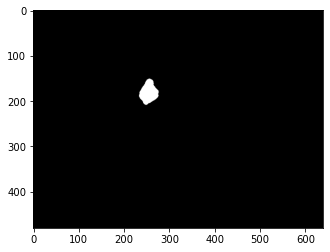

In [22]:
fig = plt.figure()
plt.imshow(mask)
plt.show()

## read_rgb_np Test

In [23]:
def read_rgb_np(rgb_path:str) -> np.ndarray:
    """
    RGB画像を読み出し，ndarray 配列 [max = 255, min = 0] として返す関数

    Args:
        rgb_path(str): rgb画像のパス

    Returns:
        img (np.ndarray): rgb 画像の ndarray 配列
    """
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = Image.open(rgb_path).convert('RGB')
    img = np.array(img,np.uint8)
    return img

In [24]:
idx = 1

img_path = os.path.join(cfg.PVNET_LINEMOD_DIR, '{}/JPEGImages/{:06}.jpg'.format(object_name, idx))

img = read_rgb_np(rgb_path=img_path)
print('img type')
print(type(img))
print('max =')
print(img.max())
print('img =')
print(img)

img type
<class 'numpy.ndarray'>
max =
255
img =
[[[ 34  34  36]
  [ 33  33  35]
  [ 31  31  33]
  ...
  [127 135 172]
  [ 76  85 126]
  [ 68  77 120]]

 [[ 34  34  36]
  [ 34  34  36]
  [ 32  32  34]
  ...
  [120 128 165]
  [ 74  83 124]
  [ 67  76 119]]

 [[ 33  33  35]
  [ 33  33  35]
  [ 33  33  35]
  ...
  [109 117 154]
  [ 72  81 122]
  [ 65  74 117]]

 ...

 [[ 41  44  59]
  [ 40  43  58]
  [ 40  43  58]
  ...
  [168 162 162]
  [166 160 160]
  [164 158 158]]

 [[ 42  45  60]
  [ 41  44  59]
  [ 41  44  59]
  ...
  [174 168 170]
  [172 166 168]
  [168 162 164]]

 [[ 43  46  61]
  [ 42  45  60]
  [ 41  44  59]
  ...
  [173 167 169]
  [176 170 174]
  [173 167 171]]]


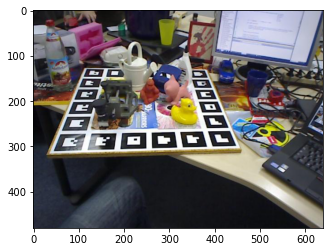

In [25]:
fig = plt.figure()
plt.imshow(img)
plt.show()

## read_ply_model Test

In [26]:
def read_ply_model(model_path: str) -> np.array:
        """
         `.ply` 形式で保存された 3D モデルを numpy 配列として読み出す関数
        
        Arg:
            model_path(str): `.ply` 形式で保存された3Dモデルへのパス

        Return:
            (np.array): numpy配列に変換した 3D モデル 
        """
        ply = PlyData.read(model_path)
        data = ply.elements[0].data
        x = data['x']
        y = data['y']
        z = data['z']
        return np.stack([x, y, z], axis=-1)

In [27]:
filenames = glob(os.path.join(base_dir, object_name, 'mesh.ply'))
print(filenames)
filename = filenames[0]

ply_model = read_ply_model(filename)
print('ply_model = ')
print(ply_model)
print('shape =', ply_model.shape)

['/media/miki/DATA/My_programing/python/AI/Analysis/data/linemod/ape/mesh.ply']
ply_model = 
[[ 27.601    22.0686  -37.7873 ]
 [ 17.4218  -24.9059  -16.8277 ]
 [ 36.8221  -13.0557  -12.0928 ]
 ...
 [  4.05309  27.7681   -4.69088]
 [ 20.2621  -22.0967  -25.9147 ]
 [ 17.7486   13.0133  -84.2276 ]]
shape = (5841, 3)


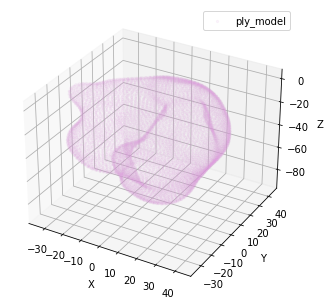

In [28]:
X_ply_model = []
Y_ply_model = []
Z_ply_model = []

for value in ply_model:
    X_ply_model.append(value[0])
    Y_ply_model.append(value[1])
    Z_ply_model.append(value[2])

# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# .scatterで描画
ax.scatter(X_ply_model,
                      Y_ply_model,
                      Z_ply_model,
                      s=5,
                      c="plum",
                      marker="o",
                      alpha=0.1,
                      label="ply_model")

# 凡例を表示          
ax.legend()

# 最後に.show()を書いてグラフ表示
plt.show()